In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("weight-height.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [33]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Height', ylabel='Density'>

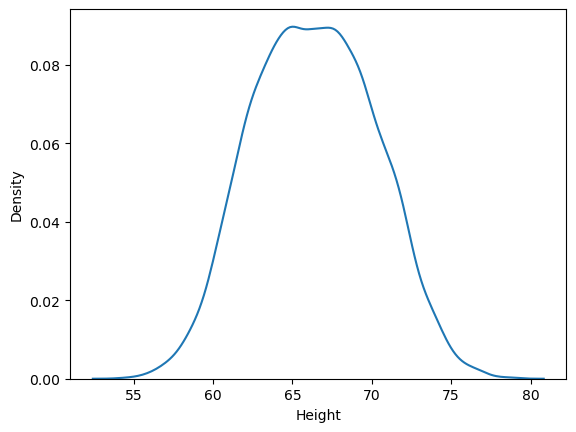

In [34]:
# so basically in this dataset there are 10000 rows
sns.kdeplot(df["Height"])

<Axes: ylabel='Height'>

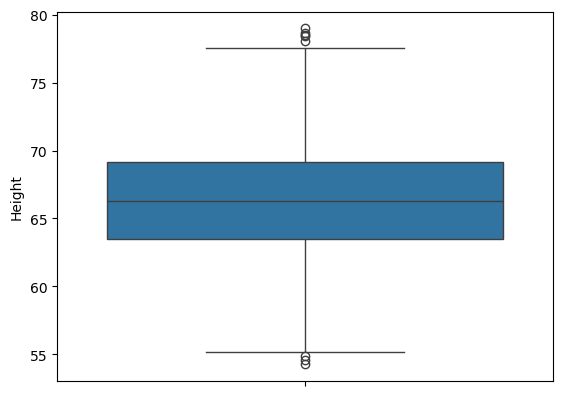

In [35]:
sns.boxplot(df["Height"])
# so basically there are some outliers in the data

In [36]:
upper_limit=df["Height"].quantile(0.99)
lower_limit=df["Height"].quantile(0.01)

In [37]:
upper_limit

np.float64(74.7857900583366)

In [38]:
lower_limit

np.float64(58.13441158671655)

In [39]:
df[(df["Height"] > upper_limit) | (df["Height"] < lower_limit)]
# this are the outliers because the are not in this range

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# 1) trimming

In [40]:
new_df=df[(df["Height"] <= upper_limit) & (df["Height"] >= lower_limit)]

In [41]:
new_df
#here we have remove the rows which have outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

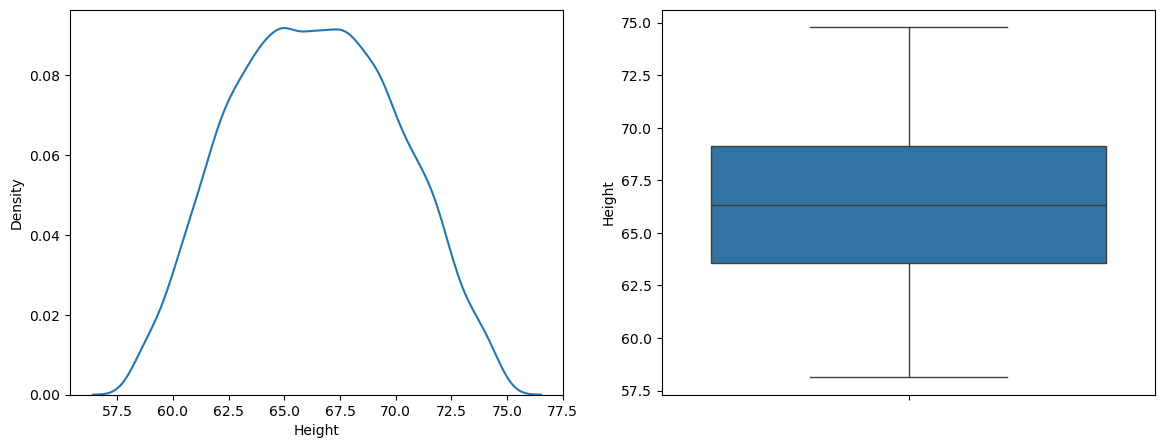

In [42]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.kdeplot(new_df["Height"])

plt.subplot(122)
sns.boxplot(new_df["Height"])

# 2) capping (winsorization)

In [43]:
df["Height"]=np.where(
    df["Height"] > upper_limit,
    upper_limit,
    np.where(
        df["Height"] < lower_limit,
        lower_limit,
        df["Height"]))
# here we jave cap the values with the upper and lower limit

In [44]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

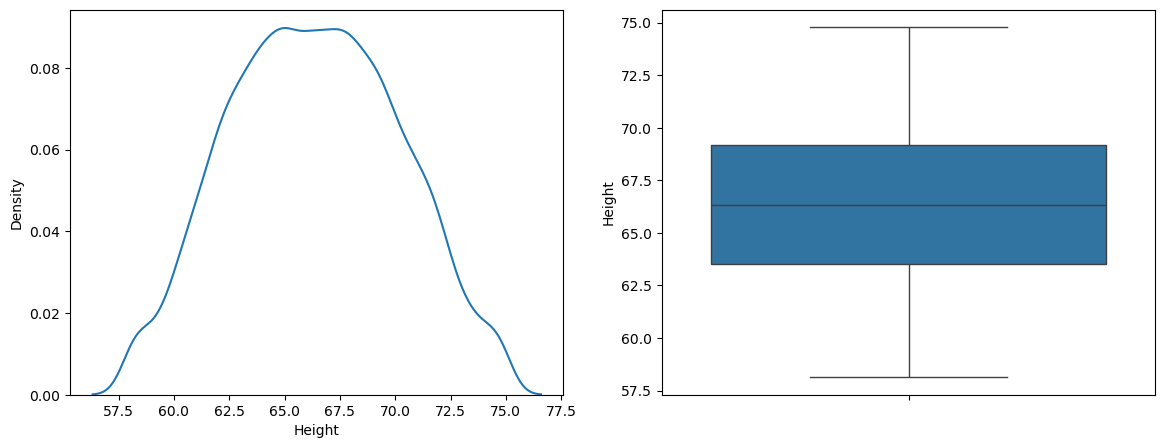

In [45]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.kdeplot(df["Height"])

plt.subplot(122)
sns.boxplot(df["Height"])

In [ ]:
- so basically la